In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import os
from bidi.algorithm import get_display
import re
import multiprocessing

In [3]:
import pickle

In [4]:
file_type = 'thread'
field_name = 'title'

In [5]:
pickle_file = open(f'{file_type}_{field_name}_token_lists.pickle', "rb" )
corpus = pickle.load( pickle_file )
pickle_file.close()

In [6]:
corpus_temp = list()
for sentence in corpus:
    sentence_temp = list()
    for word in sentence:
        try:
            if len(word) > 1:
                sentence_temp.append(get_display(word))
        except:
            print(word)
    corpus_temp.append(' '.join(reversed(sentence_temp)))
corpus = corpus_temp

מנילה?🤨


In [7]:
corpus[0]

'.רוזע ,ןיינעתה הנורוק התומע'

In [8]:
##Creating a list of stop words and adding custom stopwords
import codecs
with codecs.open('stopwords.txt', 'r', encoding='utf8') as f:
    text = f.read()
stop_words = set(get_display(word) for word in text.split('\r\n'))

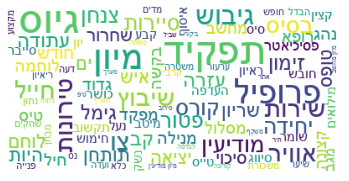

In [9]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42,
                          font_path='Fonts/Arial.ttf'
                         ).generate(' '.join(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

In [10]:
new_corpus = list()
for sentence in corpus:
    new_corpus.append(' '.join([word for word in sentence.split() if not word in stop_words]))

In [11]:
corpus = new_corpus

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(new_corpus)

In [13]:
list(cv.vocabulary_.keys())[:10]

['רוזע',
 'ןיינעתה',
 'הנורוק',
 'התומע',
 'רוזע ןיינעתה',
 'ןיינעתה הנורוק',
 'רוזע ןיינעתה הנורוק',
 'ןיינעתה הנורוק התומע',
 'דיקפת',
 'ץוביש']

In [14]:
import seaborn

[Text(0, 0, 'ןוימ'),
 Text(0, 0, 'סויג'),
 Text(0, 0, 'דיקפת'),
 Text(0, 0, 'ליפורפ'),
 Text(0, 0, 'שוביג'),
 Text(0, 0, 'ריווא'),
 Text(0, 0, 'ןיעידומ'),
 Text(0, 0, 'וצ'),
 Text(0, 0, 'תוריש'),
 Text(0, 0, 'לייח'),
 Text(0, 0, 'תונוריט'),
 Text(0, 0, 'ץוביש'),
 Text(0, 0, 'סיסב'),
 Text(0, 0, 'סרוק'),
 Text(0, 0, 'ןחנצ'),
 Text(0, 0, 'תורייס'),
 Text(0, 0, 'רוטפ'),
 Text(0, 0, 'הדיחי'),
 Text(0, 0, 'הרזע'),
 Text(0, 0, 'ןומיז')]

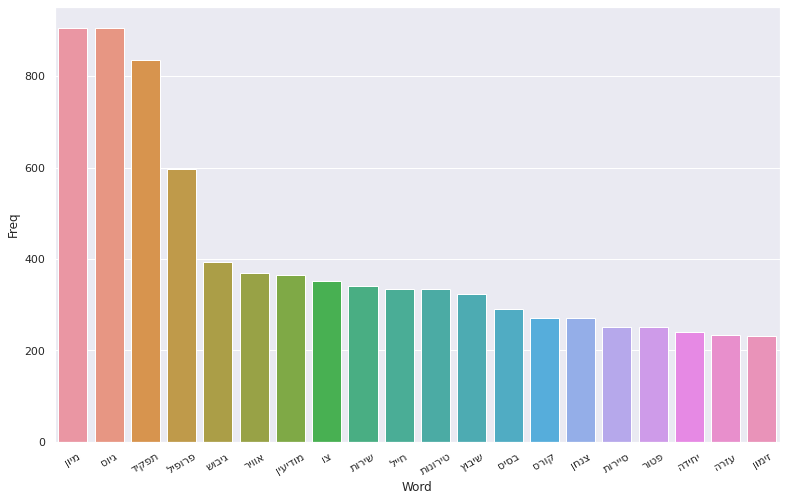

In [15]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0      ןיעידומ ןוימ    60
1         בשחמ ןוימ    52
2          ןוי ןיצק    51
3       רבייס תונכת    32
4   הקזחא היגולונכט    32
5        ריווא ךרעמ    30
6        דיקפת ןוימ    28
7          סיט ןוימ    23
8        ןחנצ שוביג    21
9         השקב הרזע    21
10       ןוימ ןומיז    21
11       ריווא ןוימ    21
12      ריווא דיקפת    20
13       המחול ןוימ    20
14       סויג ךיראת    19
15      הפדעה ןולאש    18
16       בושקת ןוימ    18
17         ןוימ תשק    17
18         ץרמ סויג    15
19     ליפורפ דיקפת    14


[Text(0, 0, 'ןיעידומ ןוימ'),
 Text(0, 0, 'בשחמ ןוימ'),
 Text(0, 0, 'ןוי ןיצק'),
 Text(0, 0, 'רבייס תונכת'),
 Text(0, 0, 'הקזחא היגולונכט'),
 Text(0, 0, 'ריווא ךרעמ'),
 Text(0, 0, 'דיקפת ןוימ'),
 Text(0, 0, 'סיט ןוימ'),
 Text(0, 0, 'ןחנצ שוביג'),
 Text(0, 0, 'השקב הרזע'),
 Text(0, 0, 'ןוימ ןומיז'),
 Text(0, 0, 'ריווא ןוימ'),
 Text(0, 0, 'ריווא דיקפת'),
 Text(0, 0, 'המחול ןוימ'),
 Text(0, 0, 'סויג ךיראת'),
 Text(0, 0, 'הפדעה ןולאש'),
 Text(0, 0, 'בושקת ןוימ'),
 Text(0, 0, 'ןוימ תשק'),
 Text(0, 0, 'ץרמ סויג'),
 Text(0, 0, 'ליפורפ דיקפת')]

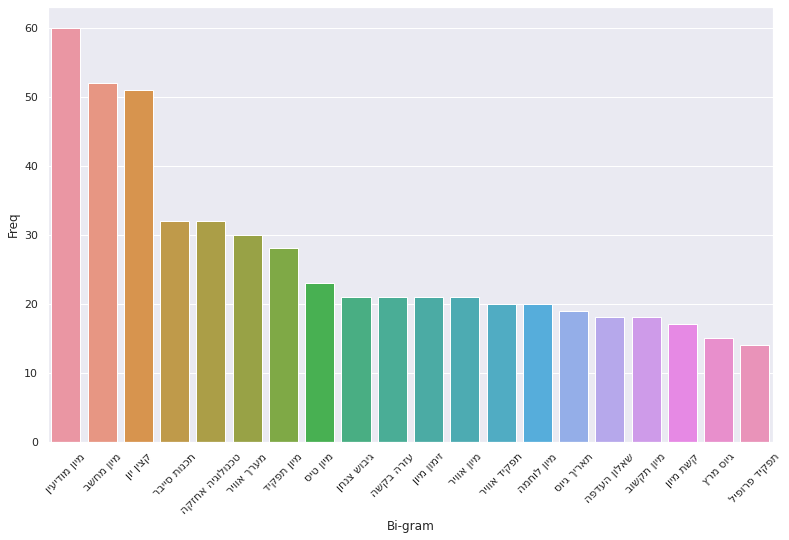

In [16]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                 Tri-gram  Freq
0        רבייס תונכת ןוימ    13
1    הקזחא היגולונכט ךרעמ    10
2         בושקת בשחמ ןוימ     6
3         ףרוע הלצה ץוליח     5
4        הדותע דסומ םושיר     3
5        ריווא דיקפת ןוימ     3
6        ןחנצ שוביג ןומיז     3
7       הפדעה ןולאש דיקפת     3
8        הנוצק לולסמ ןוימ     3
9         בשחמ בושקת ןוימ     3
10       ריווא ךרעמ דיקפת     3
11       ריווא ךרעמ ץוביש     3
12     בושקת ןיעידומ ןוימ     3
13         םימחו תויה שיא     3
14        ריווא ךרעמ סרוק     3
15  לוהוכלא תוירגיס גוויס     2
16         סויג בשחמ ןוימ     2
17        ןחנצ שוביג העגה     2
18         ןוי ןיצק ןויאר     2
19        ןחתות המח דיקפת     2


[Text(0, 0, 'רבייס תונכת ןוימ'),
 Text(0, 0, 'הקזחא היגולונכט ךרעמ'),
 Text(0, 0, 'בושקת בשחמ ןוימ'),
 Text(0, 0, 'ףרוע הלצה ץוליח'),
 Text(0, 0, 'הדותע דסומ םושיר'),
 Text(0, 0, 'ריווא דיקפת ןוימ'),
 Text(0, 0, 'ןחנצ שוביג ןומיז'),
 Text(0, 0, 'הפדעה ןולאש דיקפת'),
 Text(0, 0, 'הנוצק לולסמ ןוימ'),
 Text(0, 0, 'בשחמ בושקת ןוימ'),
 Text(0, 0, 'ריווא ךרעמ דיקפת'),
 Text(0, 0, 'ריווא ךרעמ ץוביש'),
 Text(0, 0, 'בושקת ןיעידומ ןוימ'),
 Text(0, 0, 'םימחו תויה שיא'),
 Text(0, 0, 'ריווא ךרעמ סרוק'),
 Text(0, 0, 'לוהוכלא תוירגיס גוויס'),
 Text(0, 0, 'סויג בשחמ ןוימ'),
 Text(0, 0, 'ןחנצ שוביג העגה'),
 Text(0, 0, 'ןוי ןיצק ןויאר'),
 Text(0, 0, 'ןחתות המח דיקפת')]

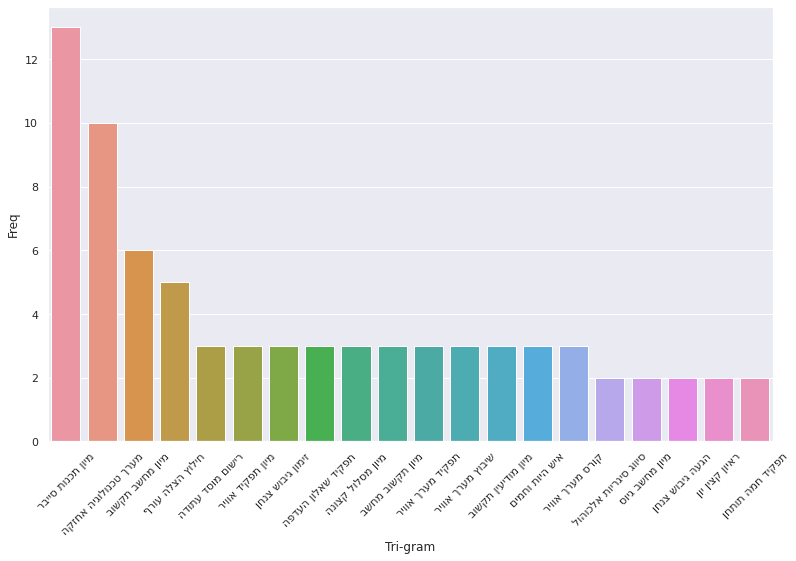

In [17]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [19]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
?סויג דיקפת

Keywords:
סויג דיקפת 0.818
דיקפת 0.411
סויג 0.402


In [20]:
def send_email(user='dsakaidf@gmail.com', pwd='d54k4idf!', recipient='shkasta@post.bgu.ac.il',
               subject='finish expirement', body='finish the expirement'):
    import smtplib

    gmail_user = user
    gmail_pwd = pwd
    FROM = user
    TO = recipient if type(recipient) is list else [recipient]
    SUBJECT = subject
    TEXT = body

    # Prepare actual message
    message = """From: %s\nTo: %s\nSubject: %s\n\n%s
    """ % (FROM, ", ".join(TO), SUBJECT, TEXT)
    try:
        # SMTP_SSL Example
        server_ssl = smtplib.SMTP_SSL("smtp.gmail.com", 465)
        server_ssl.ehlo()  # optional, called by login()
        server_ssl.login(gmail_user, gmail_pwd)
        # ssl server doesn't support or need tls, so don't call server_ssl.starttls()
        server_ssl.sendmail(FROM, TO, message)
        # server_ssl.quit()
        server_ssl.close()
        print('successfully sent the mail')
    except:
        print("failed to send mail")


In [21]:
send_email()

successfully sent the mail


In [22]:
elapsed_time = time.time() - start_time
print(elapsed_time)

14.114534139633179
